In [1]:
import pandas as pd

In [77]:
df = pd.read_csv('olympic/summer.csv', sep=',')

In [18]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [19]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

## Olympics 2012 - Médailles par pays

In [25]:
df_2012 = df[df['Year'] == 2012]

In [30]:
df_2012_gold = df_2012[df_2012['Medal'] == 'Gold']

In [32]:
df_gold_medals = df_2012_gold[['Country', 'Medal']].groupby('Country').count()

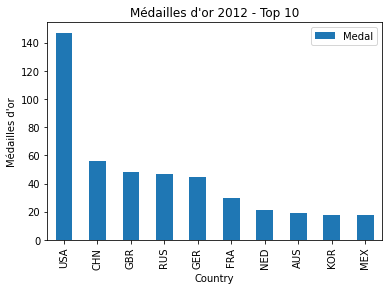

In [45]:
ax = df_gold_medals.sort_values(by='Medal', ascending=False).head(10).plot.bar();
ax.set_title("Médailles d'or 2012 - Top 10")
ax.set_ylabel("Médailles d'or");

# Modèle - Qui gagne la médaille?

Voir dictionary.csv pour des données sur chaque pays. Est-ce que les grands pays ont un avantage? Ou les plus riches? À voir!

In [75]:
# Summer medals
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [78]:
df['Year'].max()

2012

In [80]:
df2 = df[['Country', 'Medal']]
df2 = df2[df2['Medal'] == 'Gold']
df2 = df2.groupby('Country').count()
df2.head()

,Medal
Country,
ALG,5
ANZ,20
ARG,69
ARM,1
AUS,312


In [81]:
df_dict = pd.read_csv('olympic/dictionary.csv', sep=',')

In [82]:
df_dict.sample()

,Country,Code,Population,GDP per Capita
31,Burundi,BDI,11178921.0,277.068309


In [83]:
df3 = pd.merge(left=df2, right=df_dict, left_on="Country", right_on="Code")

In [84]:
df3.columns

Index(['Medal', 'Country', 'Code', 'Population', 'GDP per Capita'], dtype='object')

In [89]:
df3.size

430

In [91]:
# Enlever là où il y a pas de données
df3 = df3.dropna()

In [93]:
df3 = df3.drop(columns = 'Country')

In [96]:
df3 = df3.rename(columns={ 'Medal': 'GoldMedal' })

In [98]:
df3 = df3.rename(columns={ 'GDP per Capita': 'GDP' })

In [99]:
df3

,GoldMedal,Code,Population,GDP
0,5,ALG,39666519.0,4206.031232
1,69,ARG,43416755.0,13431.878340
2,1,ARM,3017712.0,3489.127690
3,312,AUS,23781169.0,56310.962993
4,21,AUT,8611088.0,43774.985174
...,...,...,...,...
80,41,UKR,45198200.0,2114.954716
81,44,URU,3431555.0,15573.900919
82,2235,USA,321418820.0,56115.718426
83,5,UZB,31299500.0,2132.070368


### Modèle

In [56]:
import sklearn

In [139]:
from sklearn.linear_model import LinearRegression

Résultat voulu:
* X = ['Population', 'GDP']
* Y = 'GoldMedals' -> à créer nous-même !

In [110]:
features = ['Population', 'GDP']
y_label = 'GoldMedal'

In [100]:
df3.dtypes

GoldMedal       int64
Code           object
Population    float64
GDP           float64
dtype: object

In [107]:
x = df3[features].values
x.shape

(80, 2)

In [112]:
y = df3[y_label].values
y.shape

(80,)

In [101]:
model = LinearRegression()

In [113]:
model.fit(x, y)

LinearRegression()

In [114]:
df3.head(1)

,GoldMedal,Code,Population,GDP
0,5,ALG,39666519.0,4206.031232


In [116]:
import numpy as np

In [137]:
x_test = np.array([[8000000, 150000]])
model.predict(x_test)[0]

723.477503666871

In [122]:
df3[features].iloc[10]

Population    2.078475e+08
GDP           8.538590e+03
Name: 10, dtype: float64

In [134]:
"""
Make a prediction on DataFrame df at index n
"""
def predict_one(df, n):
    print("Country:", df['Code'].iloc[n])
    print("Expected:", df[y_label].iloc[n])
    result = model.predict([df[features].iloc[n]])
    print("Predicted:", result[0])

In [135]:
predict_one(df3, 10)

Country: BRA
Expected: 73
Predicted: 93.5838160710932


## Autre modèle vite fait

In [140]:
from sklearn.tree import DecisionTreeRegressor

In [141]:
model2 = DecisionTreeRegressor()

In [142]:
model2.fit(x,y)

DecisionTreeRegressor()

In [144]:
x_test = np.array([[8000000, 150000]])
model.predict(x_test)[0]

723.477503666871

In [154]:
x_test = np.array([[9900000, 80000]])
model2.predict(x_test)[0]

312.0

In [148]:
df3[df3['Code'] == 'SUI']

,GoldMedal,Code,Population,GDP
68,75,SUI,8286976.0,80945.079219
